# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
import sklearn as sk

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path ='/content/drive/MyDrive/Assignments/CNN/Dataset_Waste_Segregation.zip'

Load the dataset.

In [5]:
# Load and unzip the dataset

import zipfile
import os
import shutil

zip_file_path = file_path

extracted_path = '/content/Dataset_Waste_Segregation'

if os.path.exists(extracted_path):
    shutil.rmtree(extracted_path)
    print(f"Removed existing directory: {extracted_path}")
else:
    print(f"Directory does not exist: {extracted_path}")
os.makedirs(extracted_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Dataset unzipped to: {extracted_path}")

# Check for and extract any nested zip files
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        if file.endswith(".zip"):
            nested_zip_path = os.path.join(root, file)
            nested_extracted_path = os.path.join(root, os.path.splitext(file)[0])
            print(f"Found nested zip file: {nested_zip_path}")
            try:
                with zipfile.ZipFile(nested_zip_path, 'r') as nested_zip_ref:
                    nested_zip_ref.extractall(nested_extracted_path)
                print(f"Nested zip file extracted to: {nested_extracted_path}")
                os.remove(nested_zip_path)
                print(f"Removed nested zip file: {nested_zip_path}")
            except zipfile.BadZipFile:
                print(f"Error: Could not extract {nested_zip_path}. It might be corrupted or not a valid zip file.")

Removed existing directory: /content/Dataset_Waste_Segregation
Dataset unzipped to: /content/Dataset_Waste_Segregation
Found nested zip file: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip
Nested zip file extracted to: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data
Removed nested zip file: /content/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images

from PIL import Image

def load_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        return img
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels

data_dir = extracted_path + '/Dataset_Waste_Segregation/data/data'


images = []
labels = []
class_names = sorted(os.listdir(data_dir))

class_names

['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

In [8]:
print("Loading images and labels...")
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                img = load_image(image_path)
                if img is not None:
                    images.append(img)
                    labels.append(class_name)
print("Loading complete.")

print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")
print(f"Class names: {class_names}")

Loading images and labels...
Loading complete.
Number of images loaded: 7625
Number of labels loaded: 7625
Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


First image: <PIL.Image.Image image mode=RGB size=256x256 at 0x7A8603569B50>
First label: Cardboard


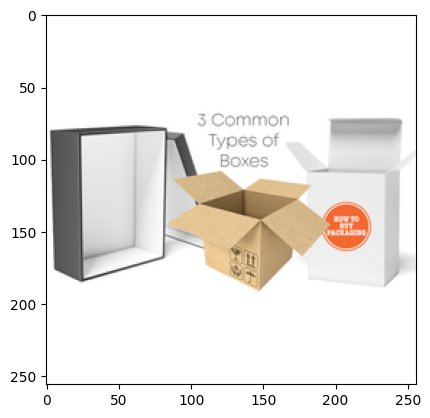

In [9]:

if len(images) > 0:
    print("First image:", images[0])
    plt.imshow(images[0])
    print("First label:", labels[0])

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

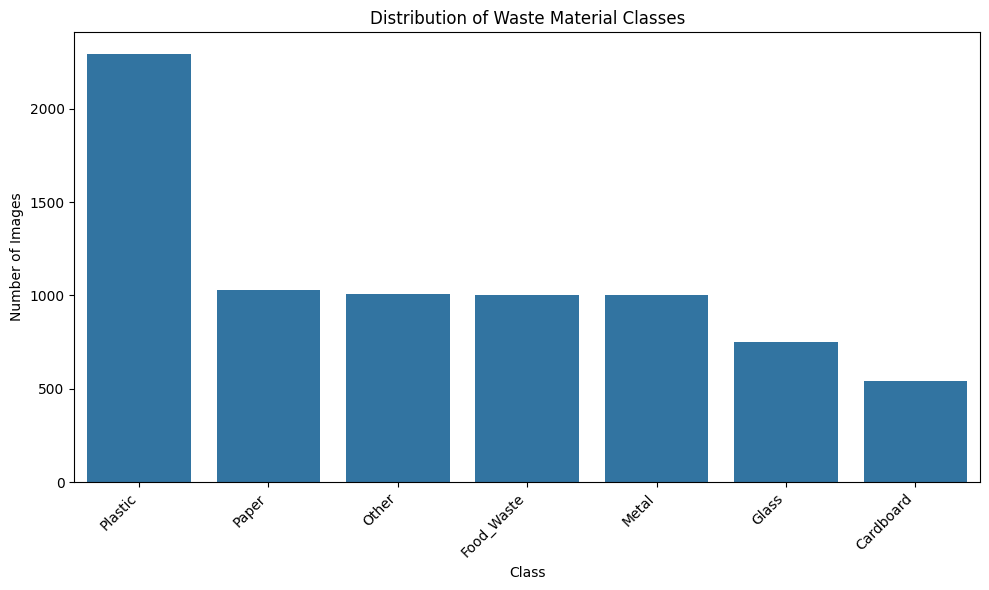

In [10]:
# Visualise Data Distribution

label_counts = pd.Series(labels).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Waste Material Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [11]:
# Visualise Sample Images (across different labels)

unique_labels = list(set(labels))
sample_indices = []

for label in unique_labels:
    try:
        index = labels.index(label)
        sample_indices.append(index)
    except ValueError:
        pass

sample_indices

[2290, 3290, 0, 5330, 540, 1540, 4300]

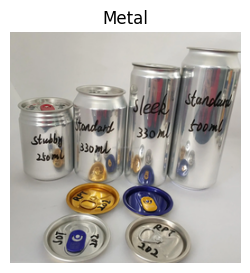

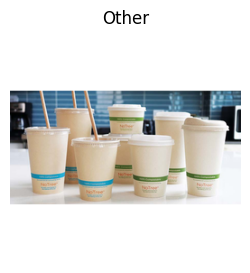

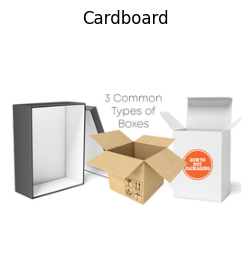

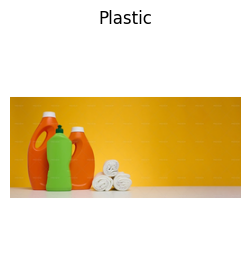

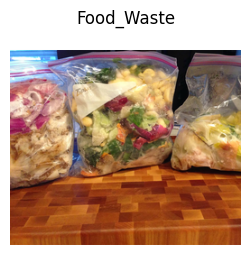

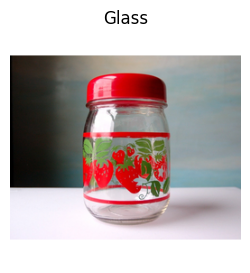

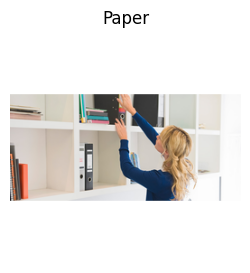

In [12]:
for indices in sample_indices:
    plt.figure(figsize=(3, 3))
    plt.imshow(images[indices])
    plt.title(labels[indices])
    plt.axis('off')
    plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [13]:
# Find the smallest and largest image dimensions from the data set

min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0

for img in images:
    if img is not None:
        width, height = img.size
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        max_width = max(max_width, width)
        max_height = max(max_height, height)

print(f"Smallest image dimensions: Width = {min_width}, Height = {min_height}")
print(f"Largest image dimensions: Width = {max_width}, Height = {max_height}")

Smallest image dimensions: Width = 256, Height = 256
Largest image dimensions: Width = 256, Height = 256


Converted resized_images list to NumPy array with shape: (7625, 224, 224, 3)
Number of resized images: 7625


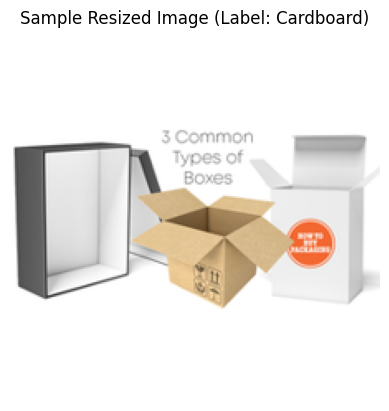

In [14]:
# Resize the image dimensions
def resize_image(images,target_size):
  resized_images = []
  for img in images:
    if img is not None:
        img_resized = img.resize(target_size)
        resized_images.append(img_resized)
  if not isinstance(resized_images, np.ndarray):
    try:
        images_array = np.stack([np.array(img) for img in resized_images if img is not None])
        print(f"Converted resized_images list to NumPy array with shape: {images_array.shape}")
    except Exception as e:
        print(f"Error converting images to NumPy array: {e}")
        images_array = None
  else:
      images_array = resized_images
  return resized_images,images_array


target_size = (224,224)
resized_images,images_array = resize_image(images,target_size)
print(f"Number of resized images: {len(resized_images)}")

if len(resized_images) > 0:
    plt.imshow(resized_images[0])
    plt.title(f"Sample Resized Image (Label: {labels[0]})")
    plt.axis('off')
    plt.show()


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [15]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(f"Shape of encoded labels array: {encoded_labels.shape}")
print(f"Classes: {label_encoder.classes_}")

num_classes = len(label_encoder.classes_)
one_hot_labels = to_categorical(encoded_labels, num_classes=num_classes)

print(f"Shape of one-hot encoded labels array: {one_hot_labels.shape}")

Shape of encoded labels array: (7625,)
Classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Shape of one-hot encoded labels array: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [16]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
        images_array,
        one_hot_labels,
        test_size=0.2,
        random_state=42,
        stratify=one_hot_labels
    )

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (6100, 224, 224, 3)
Shape of X_val: (1525, 224, 224, 3)
Shape of y_train: (6100, 7)
Shape of y_val: (1525, 7)


In [17]:
input_shape = X_train.shape[1:]
input_shape

(224, 224, 3)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [18]:
# Build and compile the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

In [20]:
# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(class_names), activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,759 (42.61 MB)

 Trainable params: 11,170,311 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

print("Model training complete.")


Epoch 1/50
126/191 ━━━━━━━━━━━━━━━━━━━━ 5:38 5s/step - accuracy: 0.2474 - loss: 9.3570

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)

In [30]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix

loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nMaking predictions on the validation set...")
y_pred = model.predict(X_val)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

target_names = label_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

Validation Loss: 1.8369
Validation Accuracy: 0.3056

Making predictions on the validation set...
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.00      0.00      0.00       108
  Food_Waste       0.00      0.00      0.00       200
       Glass       1.00      0.01      0.03       150
       Metal       1.00      0.01      0.02       200
       Other       1.00      0.01      0.03       202
       Paper       0.00      0.00      0.00       206
     Plastic       0.30      1.00      0.46       459

    accuracy                           0.31      1525
   macro avg       0.47      0.15      0.08      1525
weighted avg       0.45      0.31      0.15      1525


Confusion Matrix:
[[  0   0   0   0   0   0 108]
 [  0   0   0   0   0   0 200]
 [  0   0   2   0   0   0 148]
 [  0   0   0   2   0   0 198]
 [  0   0   0   0   3   0 199]
 [  0   0   0   0   0   0 206]
 [  0   0   0   0   0   0 459]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Analyze Class Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' list contains the original class labels as strings
if 'labels' in locals():
    label_counts = pd.Series(labels).value_counts()

    print("Class distribution:")
    print(label_counts)

    # Optional: Display as a percentage
    total_images = label_counts.sum()
    class_percentages = (label_counts / total_images) * 100

    print("\nClass distribution percentage:")
    print(class_percentages)

    # Optional: Display as a bar plot again
    plt.figure(figsize=(10, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values)
    plt.title('Distribution of Waste Material Classes')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'labels' list not found. Cannot display class distribution.")

In [ ]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_augment = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

train_generator_augmented = datagen_augment.flow(
    X_train,
    y_train,
    batch_size=32
)


datagen_val = ImageDataGenerator(rescale=1./255)
val_generator = datagen_val.flow(
    X_val,
    y_val,
    batch_size=32
)


print("Augmented data generator for training created.")
print("Data generator for validation created (with rescaling).")

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images
# Using ImageDataGenerator.flow() fulfills this role by generating augmented batches on the fly.
# No need for a separate manual function if using ImageDataGenerator.

In [ ]:
# Create the augmented training dataset
# ImageDataGenerator.flow() creates a generator that provides augmented batches.
# This avoids creating a single large augmented dataset in memory.
# train_generator_augmented (created in the previous cell) is this augmented dataset generator.

##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks (using the same ones as before)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_augmented.keras', monitor='val_accuracy', save_best_only=True) # Save with a new name

# Check if the augmented training generator and validation generator exist
if 'train_generator_augmented' in locals() and 'val_generator' in locals():
    print("Starting model training with augmented data...")
    # Train the model using the generators
    # Use steps_per_epoch and validation_steps when using generators
    history_augmented = model.fit(
        train_generator_augmented,
        steps_per_epoch=len(X_train) // train_generator_augmented.batch_size, # Number of batches per epoch
        epochs=50, # You can adjust the number of epochs
        validation_data=val_generator,
        validation_steps=len(X_val) // val_generator.batch_size, # Number of validation batches
        callbacks=[early_stopping, model_checkpoint]
    )
    print("Model training with augmented data complete.")
else:
    print("Error: Augmented training generator or validation generator not found.")
    print("Please ensure the previous cell for creating generators was executed successfully.")

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results